In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [ ]:
website = pd.read_csv('/content/leads_behavior_data.csv')
website.head()

,visit_duration,pages_viewed,time_to_contact,interaction_score,lead_source,converted,lead_id
0,14.072363,10.947666,0.646165,77.113414,Referral,1,58
1,10.609455,10.770635,0.653545,75.308243,Referral,1,96
2,6.784206,4.677701,20.319584,17.513089,Ads,0,233
3,11.337469,13.099869,1.316960,78.529426,Referral,0,36
4,7.454553,4.548512,13.477354,23.948729,Direct,0,192


In [ ]:
website.isnull().sum()

,0
visit_duration,0
pages_viewed,0
time_to_contact,0
interaction_score,0
lead_source,0
converted,0
lead_id,0


In [ ]:
website.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visit_duration     300 non-null    float64
 1   pages_viewed       300 non-null    float64
 2   time_to_contact    300 non-null    float64
 3   interaction_score  300 non-null    float64
 4   lead_source        300 non-null    object 
 5   converted          300 non-null    int64  
 6   lead_id            300 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 16.5+ KB


In [ ]:
website = website.drop('lead_id', axis = 1)
website.head()

,visit_duration,pages_viewed,time_to_contact,interaction_score,lead_source,converted
0,14.072363,10.947666,0.646165,77.113414,Referral,1
1,10.609455,10.770635,0.653545,75.308243,Referral,1
2,6.784206,4.677701,20.319584,17.513089,Ads,0
3,11.337469,13.099869,1.316960,78.529426,Referral,0
4,7.454553,4.548512,13.477354,23.948729,Direct,0


In [ ]:
print(website['lead_source'].unique())

['Referral' 'Ads' 'Direct' 'Social']


In [ ]:
for col in website:
    if website[col].dtype == 'O':
        codes, _ = pd.factorize(website[col])
        website[col] = codes + 1

## Descriptive Analysis

In [ ]:
website.describe()

,visit_duration,pages_viewed,time_to_contact,interaction_score,lead_source,converted
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.306268,6.288820,12.461851,48.850172,2.276667,0.420000
std,4.545364,3.340284,10.084836,26.836954,0.964307,0.494383
min,1.250891,0.698060,-0.620634,0.336434,1.000000,0.000000
25%,5.727717,3.308273,1.370396,25.811504,2.000000,0.000000
50%,8.182713,5.905420,12.087112,43.503456,2.000000,0.000000
75%,13.195681,8.898816,20.123872,74.371613,3.000000,1.000000
max,20.556835,15.440338,36.943849,101.898029,4.000000,1.000000


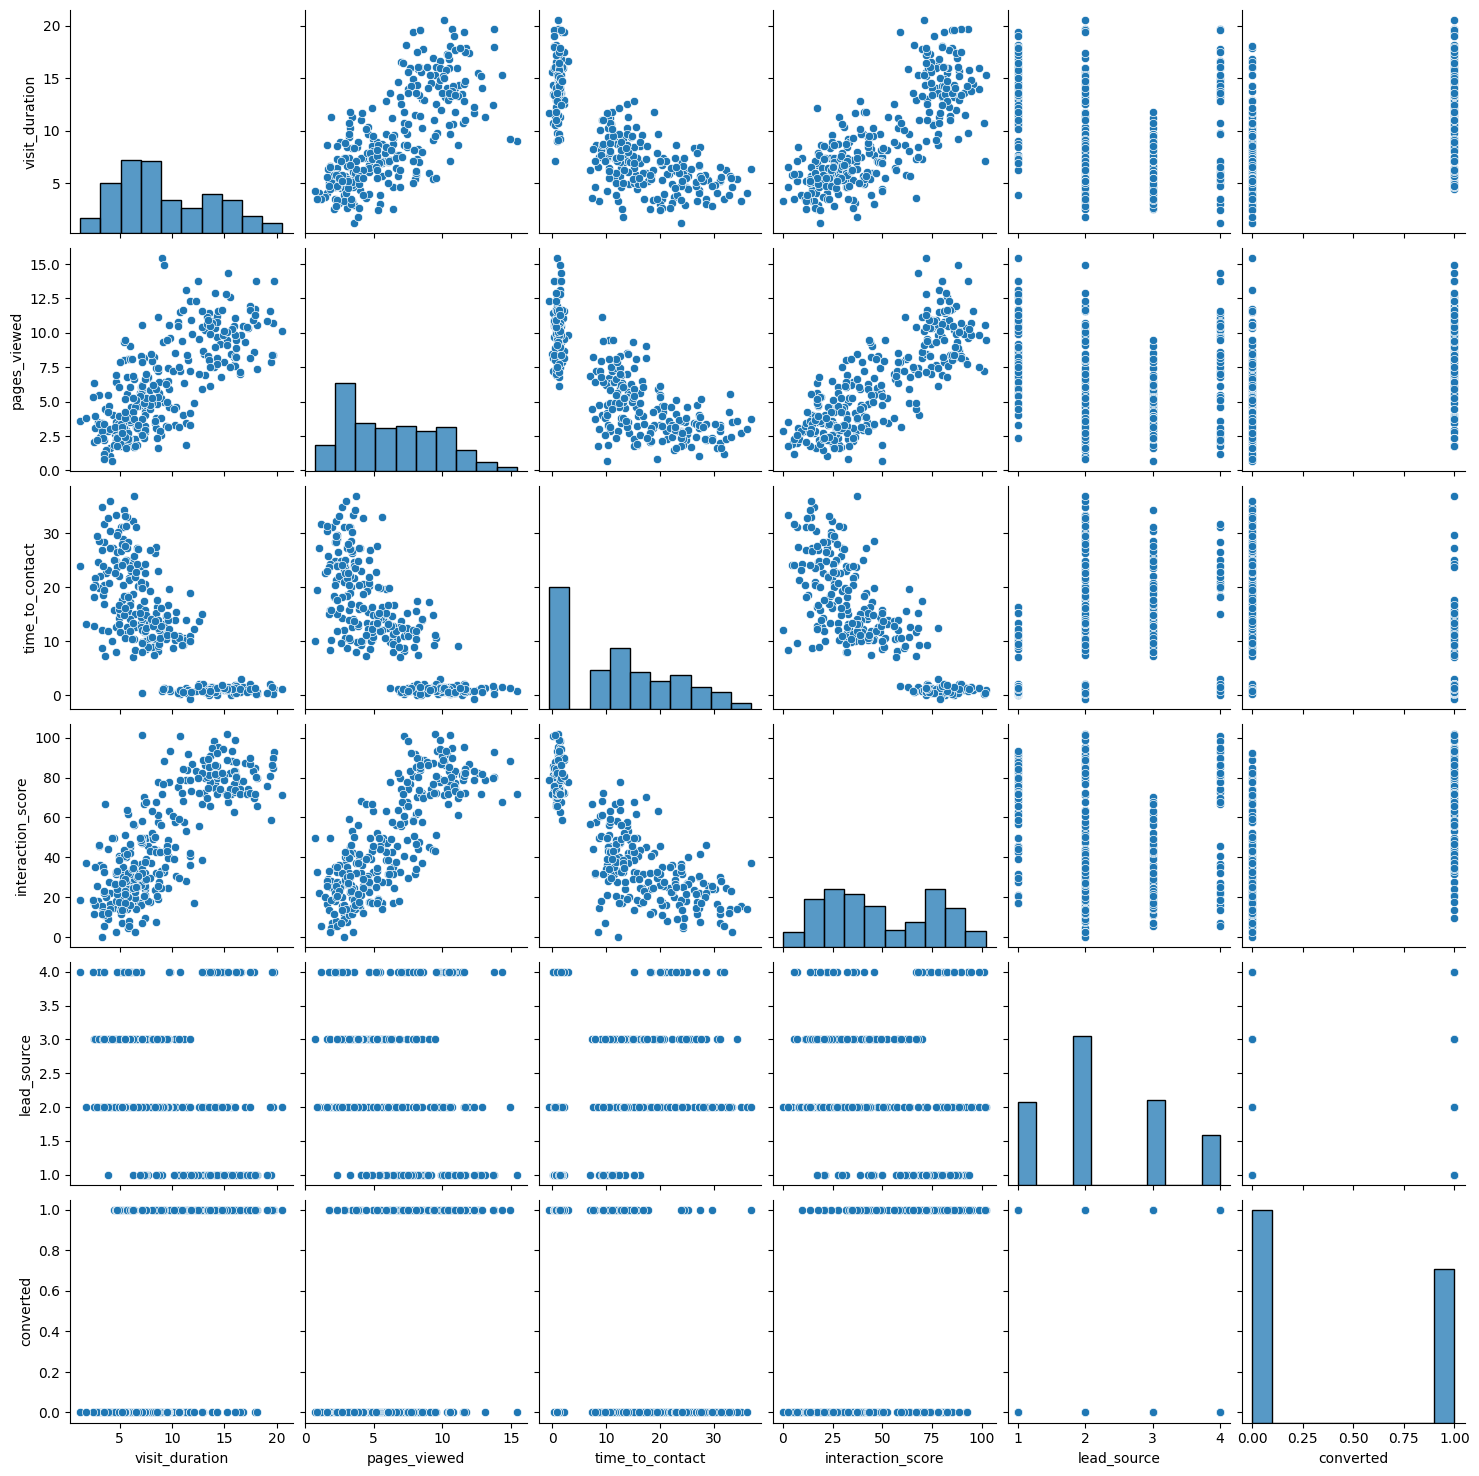

In [ ]:
sns.pairplot(website)

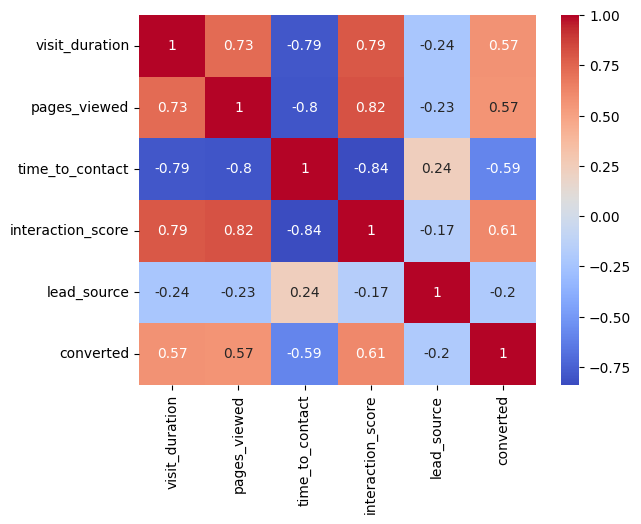

In [ ]:
corr = website.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Logistic Regression

In [ ]:
X = website.drop('converted', axis=1)
y = website['converted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
weblogreg = LogisticRegression(random_state=45)
weblogreg.fit(X_train, y_train)

LogisticRegression(random_state=45)

In [ ]:
y_pred = weblogreg.predict(X_test)

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred))

Accuracy: 0.8833333333333333
Precision: 0.8947368421052632
Recall: 0.7727272727272727
F1 Score: 0.8292682926829268


In [ ]:
logcnf = metrics.confusion_matrix(y_test, y_pred)
logcnf

array([[36,  2],
       [ 5, 17]])

<Axes: >

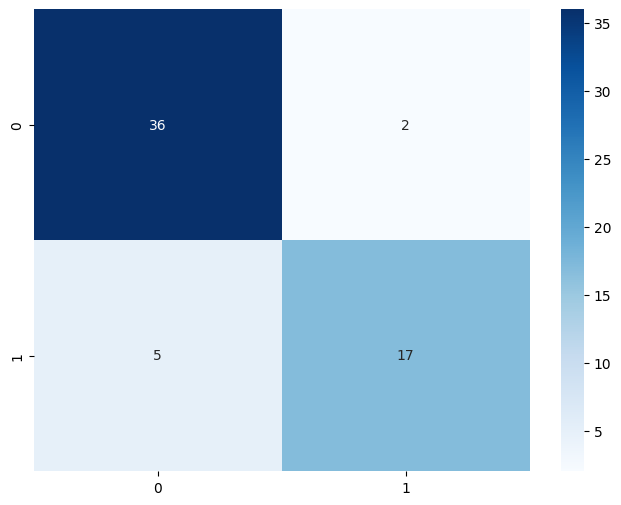

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(logcnf, annot=True, fmt='d', cmap='Blues', ax=ax)

In [ ]:
webclassification = ['No','Yes']
print(classification_report(y_test, y_pred, target_names = webclassification))

              precision    recall  f1-score   support

          No       0.88      0.95      0.91        38
         Yes       0.89      0.77      0.83        22

    accuracy                           0.88        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.88      0.88      0.88        60



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

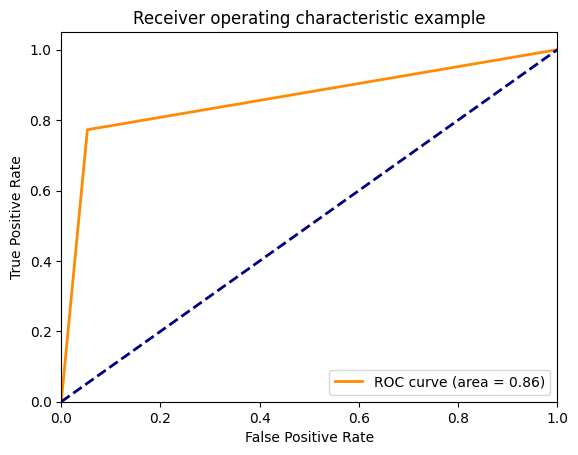

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Random Forest Classifer

In [ ]:
webscaler = StandardScaler()
X_train = webscaler.fit_transform(X_train)
X_test = webscaler.transform(X_test)

In [ ]:
webrandom = RandomForestClassifier(random_state=45)
webrandom.fit(X_train, y_train)

RandomForestClassifier(random_state=45)

In [ ]:
y_pred = webrandom.predict(X_test)

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test,y_pred))

Accuracy: 0.8
Precision: 0.7272727272727273
Recall: 0.7272727272727273
F1 Score: 0.7272727272727273


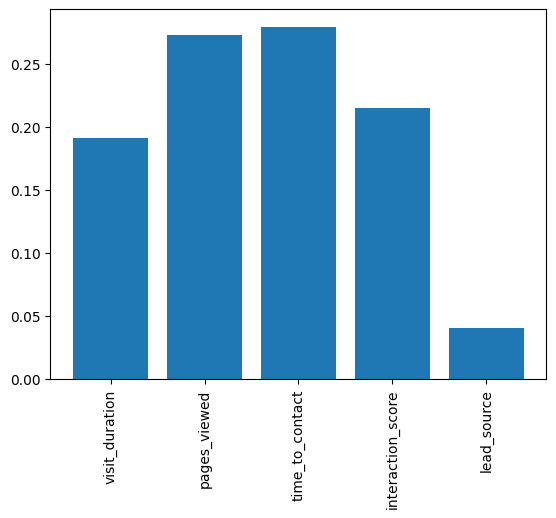

In [ ]:
webfeature = webrandom.feature_importances_
plt.bar(X.columns, webfeature)
plt.xticks(rotation='vertical')
plt.show()

## XGBoost Classifer

In [ ]:
webxgb = xgb.XGBClassifier(N_estimators = 1500, objective='binary:logistic', max_depth = 4, subsample = 0.2,
                            learning_rate = 0.05, random_state=45)
webxgb.fit(X_train, y_train)

XGBClassifier(N_estimators=1500, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, ...)

In [ ]:
y_pred = webxgb.predict(X_test)

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test,y_pred))

Accuracy: 0.8166666666666667
Precision: 0.72
Recall: 0.8181818181818182
F1 Score: 0.7659574468085106


In [ ]:
print("\nClassification Report:")
webclassification = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=webclassification))


Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.82      0.85        38
         Yes       0.72      0.82      0.77        22

    accuracy                           0.82        60
   macro avg       0.80      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



## K-means Clustering

In [ ]:
webkmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
webkmeans.fit(X_train)

KMeans(n_clusters=3, random_state=0)

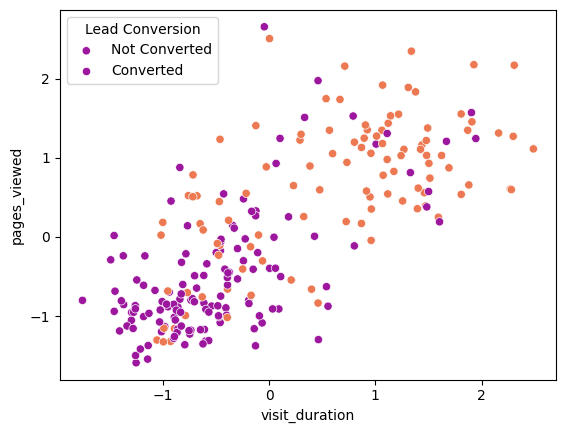

In [ ]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='plasma', hue_order=[0, 1], legend='full')
plt.xlabel('visit_duration')
plt.ylabel('pages_viewed')
plt.legend(title='Lead Conversion', labels=['Not Converted', 'Converted'])
plt.show()

## Hierarchical Clustering

In [ ]:
webcluster = AgglomerativeClustering(n_clusters=4)
webcluster.fit_predict(X_train)

array([0, 3, 2, 1, 3, 1, 3, 1, 0, 0, 3, 1, 1, 2, 3, 0, 1, 2, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 3, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 2, 3,
       2, 3, 1, 0, 1, 2, 0, 3, 1, 1, 3, 3, 3, 1, 1, 0, 0, 1, 3, 0, 0, 0,
       3, 3, 0, 2, 0, 0, 2, 1, 3, 3, 3, 3, 3, 3, 1, 0, 0, 3, 0, 1, 1, 0,
       1, 1, 0, 3, 0, 0, 1, 0, 0, 1, 3, 2, 3, 3, 3, 0, 2, 3, 1, 1, 0, 0,
       0, 1, 3, 0, 3, 1, 1, 1, 1, 0, 3, 3, 1, 2, 1, 0, 3, 2, 1, 1, 3, 0,
       0, 2, 0, 0, 1, 0, 3, 3, 1, 3, 0, 1, 1, 0, 3, 1, 0, 1, 0, 0, 1, 2,
       0, 2, 1, 3, 3, 1, 1, 1, 1, 3, 0, 1, 0, 1, 0, 0, 3, 0, 3, 3, 1, 1,
       0, 0, 1, 3, 3, 0, 1, 0, 3, 2, 3, 1, 1, 3, 0, 0, 3, 1, 1, 1, 3, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 3, 3, 0, 1, 1, 1, 1, 1, 3, 2, 0, 1,
       3, 2, 3, 3, 1, 0, 0, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 0, 0, 0])

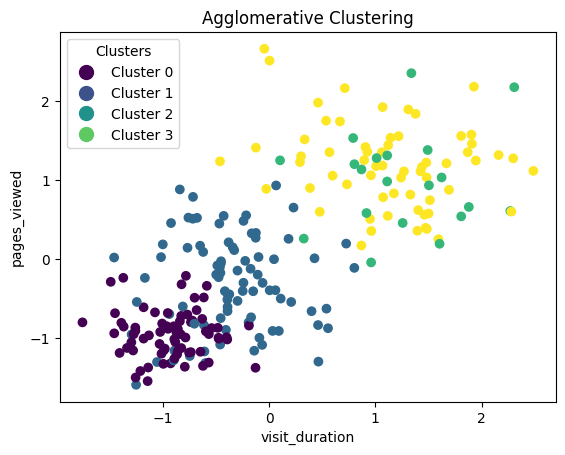

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=webcluster.labels_, cmap='viridis')
plt.xlabel('visit_duration')
plt.ylabel('pages_viewed')
plt.title('Agglomerative Clustering')
unique_labels = np.unique(webcluster.labels_)
handles = [plt.Line2D([0], [0], marker='o', color=plt.cm.viridis(i/len(unique_labels)), linestyle='', markersize=10, label=f'Cluster {label}') for i, label in enumerate(unique_labels)]
plt.legend(handles=handles, title='Clusters')
plt.show()

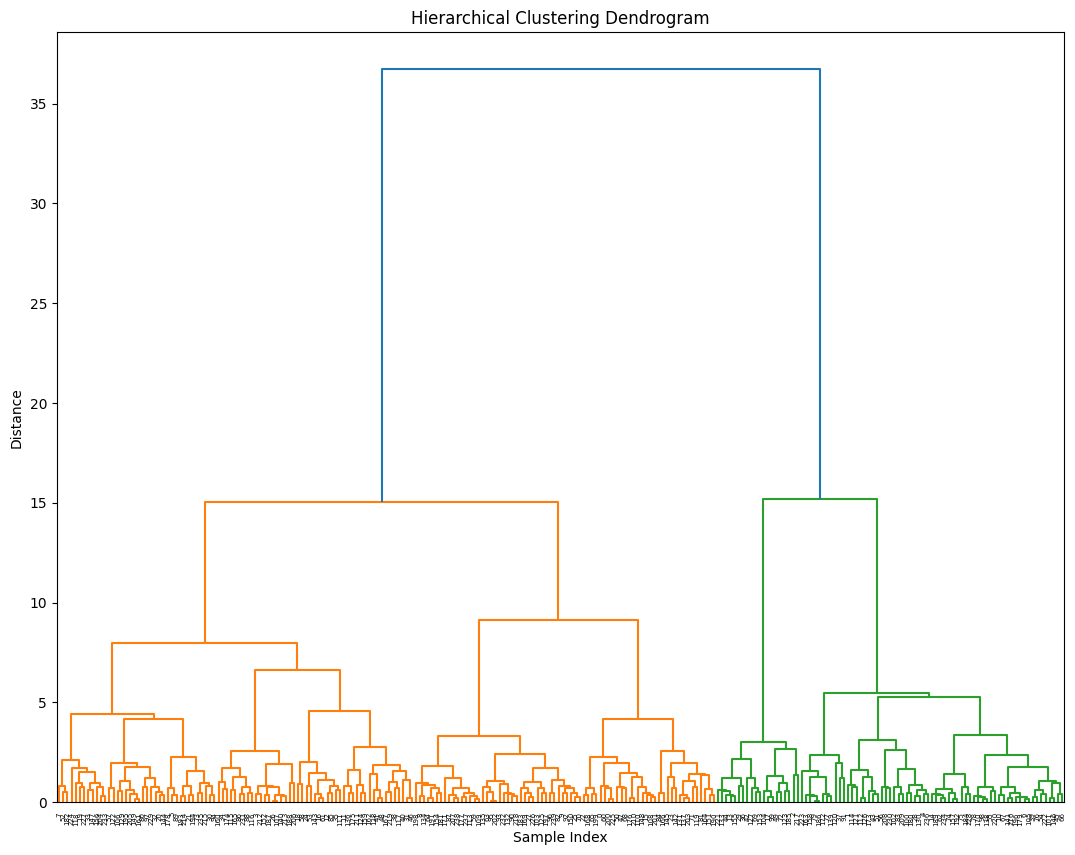

In [ ]:
W = linkage(X_train, method='ward')
plt.figure(figsize=(13,10))
dendrogram(W)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## Citations

https://www.datacamp.com/tutorial/understanding-logistic-regression-python

https://www.geeksforgeeks.org/dsa/random-forest-classifier-using-scikit-learn/

https://www.educative.io/answers/classification-using-xgboost-in-python

https://www.datacamp.com/tutorial/k-means-clustering-python

https://www.geeksforgeeks.org/machine-learning/hierarchical-clustering-with-scikit-learn/